# Notebook Dedicated to Build the real data distribution vs the MC model of B8 Solar Nue + Tl208

In [14]:
import numpy as np

import glob
import re
import os

import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, ScalarFormatter
from matplotlib.font_manager import FontProperties
from matplotlib import font_manager
from matplotlib import cm

# Load the Data

In [15]:
# ------- Observable list -------

#Define the name of the observables to be loaded. It will be applied to MC and Data, correspondingly
obs_list_solar_mc = ['energy', 'posr_av', 'posx', 'posy', 'posz_av', 'n_init_evs', 'Pee']
obs_list_tl208_mc = ['energy', 'posr_av', 'posx', 'posy', 'posz_av', 'n_init_evs']
obs_list_data = ['energy', 'posr_av', 'posx', 'posy', 'posz_av']

## General Cuts Definition

In [33]:
posr_cut = 4500

## MC Data

### $\nu_e$ Boron-8

In [34]:
#main_dir = 'E:/Data/solars/mc/bisMSB/b8Nue/np_array_resume/'
main_dir = '/home/joankl/data/solars/mc/bisMSB/b8Nue/np_array_resume/'

# ------- Observable Dictionary -------
obs_dict_b8_Nue_mc = {obs: np.array([]) for obs in obs_list_solar_mc}

# ------- Load and save observables in dictionary -------
for obs in obs_list_solar_mc:
    obs_i = np.load(main_dir + obs + '.npy')
    obs_dict_b8_Nue_mc[obs] = np.append(obs_dict_b8_Nue_mc[obs], obs_i)

# ---- Cut Condition ----
cut_condition = (obs_dict_b8_Nue_mc['posr_av'] <= posr_cut)

# ---- Choose observables ----
n_init_evs_b8_Nue_mc = obs_dict_b8_Nue_mc['n_init_evs']
energy_b8_Nue_mc = obs_dict_b8_Nue_mc['energy'][cut_condition]
Pee_b8_Nue_mc = obs_dict_b8_Nue_mc['Pee'][cut_condition]

### $\nu_\mu$ Boron-8

In [35]:
#main_dir = 'E:/Data/solars/mc/bisMSB/b8Nue/np_array_resume/'
main_dir = '/home/joankl/data/solars/mc/bisMSB/b8Numu/np_array_resume/'

# ------- Observable Dictionary -------
obs_dict_b8_Numu_mc = {obs: np.array([]) for obs in obs_list_solar_mc}

# ------- Load and save observables in dictionary -------
for obs in obs_list_solar_mc:
    obs_i = np.load(main_dir + obs + '.npy')
    obs_dict_b8_Numu_mc[obs] = np.append(obs_dict_b8_Numu_mc[obs], obs_i)

# ---- Cut Condition ----
cut_condition = (obs_dict_b8_Numu_mc['posr_av'] <= posr_cut)

# ---- Choose observables ----
n_init_evs_b8_Numu_mc = obs_dict_b8_Numu_mc['n_init_evs']
energy_b8_Numu_mc = obs_dict_b8_Numu_mc['energy'][cut_condition]
Pee_b8_Numu_mc = obs_dict_b8_Numu_mc['Pee'][cut_condition]

### Tl208

In [36]:
#main_dir = 'E:/Data/solars/mc/bisMSB/tl208/np_array_resume/'
main_dir = '/home/joankl/data/solars/mc/bisMSB/tl208/np_array_resume/'

# ------- Observable Dictionary -------
obs_dict_tl208_mc = {obs: np.array([]) for obs in obs_list_tl208_mc}

# ------- Load and save observables in dictionary -------
for obs in obs_list_tl208_mc:
    obs_i = np.load(main_dir + obs + '.npy')
    obs_dict_tl208_mc[obs] = np.append(obs_dict_tl208_mc[obs], obs_i)

# ---- Cut Condition ----
cut_condition = (obs_dict_tl208_mc['posr_av'] <= posr_cut)

# ---- Choose observables ----
energy_tl208_mc = obs_dict_tl208_mc['energy'][cut_condition]
n_init_evs_tl208_mc = obs_dict_tl208_mc['n_init_evs']

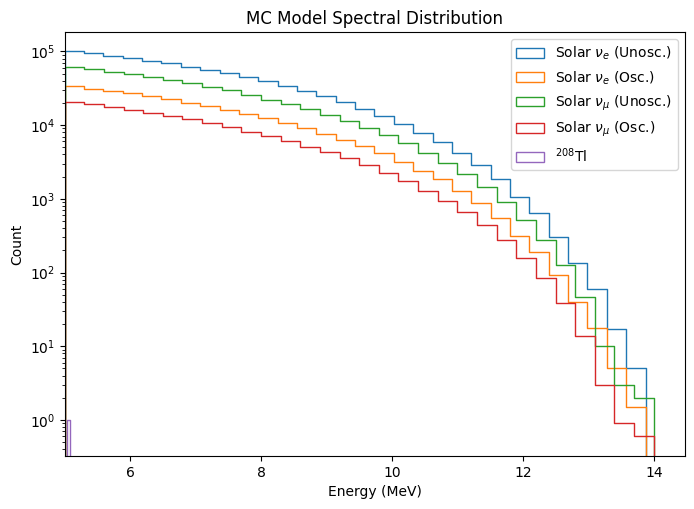

In [37]:
plt.figure(figsize = (8,5.5))

bins = 30

sn.histplot(energy_b8_Nue_mc, bins = bins, element = 'step', alpha = 0, label = r'Solar $\nu_e$ (Unosc.)')
sn.histplot(x = energy_b8_Nue_mc, bins = bins, element = 'step', alpha = 0, weights = Pee_b8_Nue_mc , label = r'Solar $\nu_e$ (Osc.)')
sn.histplot(energy_b8_Numu_mc, bins = bins, element = 'step', alpha = 0, label = r'Solar $\nu_\mu$ (Unosc.)')
sn.histplot(x = energy_b8_Numu_mc, bins = bins, element = 'step', alpha = 0, weights = Pee_b8_Numu_mc, label = r'Solar $\nu_\mu$ (Osc.)')
sn.histplot(energy_tl208_mc, bins = bins, element = 'step', alpha = 0, label = '$^{208}$Tl')

plt.xlabel('Energy (MeV)')

plt.yscale('log')
plt.legend(loc = 'best')

plt.title('MC Model Spectral Distribution')

plt.xlim(5,)

plt.show()

## Real Data

In [38]:
# ------- Directory of data -------
#data_type = ['analysis15', 'analysis15_bMR', 'analysis20_bMR']
#main_dir = 'E:/Data/solars/solarnu_Realdata/bisMSB/first_candidates/analysis*/resume_files/'
#main_dir = '/content/drive/MyDrive/SNO+ Analysis/data/solar_data/real_data/bis_MSB/Analysis*/resume_files/'
main_dir = '/home/joankl/data/solars/real_data/bisMSB/first_candidates/analysis*/resume_files/'

# ------- Observable Dictionary -------
obs_dict_data = {obs: np.array([]) for obs in obs_list_data}

# Loop over the observable list to load the data in obs_dict

for obs in obs_list_data:
    obs_dir_list = glob.glob(main_dir + obs + '.npy') # List of directories where the obs is

    # Now loop over the list of directories
    for fdir in obs_dir_list:
        obs_i = np.load(fdir)

        #Save the loaded numpy array in the corresponding key observable in the observable dictioary
        obs_dict_data[obs] = np.append(obs_dict_data[obs], obs_i)

# ---- Cut Condition ----
cut_condition = (obs_dict_data['posr_av'] <= posr_cut)
        

energy_data = obs_dict_data['energy'][cut_condition]
#posr_av = obs_dict['posr_av']
#posx = obs_dict['posx']
#posy = obs_dict['posy']
#posz = obs_dict['posz_av']

# MC Data Scaling Factors

Note: Before representing the MC with oscillations, lets only use the non-oscillated MC but use the number of expected events considering oscillations

In [39]:
# ======= Definition of Important Quantities =======

# ------ Dataset Lifetime ------
dataset_lf_time = 339.25  # days

# ------ Expected event rate per day ------
N_b8_unosc_Nue_per_day = 2483.56/365 # nue without oscillations
N_b8_osc_Nue_per_day = 862.65/365 # nue with oscillations
N_b8_Numu_per_day = 289.10/365  # numu after oscillation
N_tl208_per_day = 2.576448     

# ------ MC selection efficiency ------
# 8B Nue
n_init_evs_b8_Nue = np.sum(n_init_evs_b8_Nue_mc)
n_final_evs_b8_Nue = len(energy_b8_Nue_mc)
eff_mc_b8_Nue = n_final_evs_b8_Nue / n_init_evs_b8_Nue

# 8B Numu
n_init_evs_b8_Numu = np.sum(n_init_evs_b8_Numu_mc)
n_final_evs_b8_Numu = len(energy_b8_Numu_mc)
eff_mc_b8_Numu = n_final_evs_b8_Numu / n_init_evs_b8_Numu

# Tl208
n_init_evs_tl208 = np.sum(n_init_evs_tl208_mc)
n_final_evs_tl208 = len(energy_tl208_mc)
eff_mc_tl208 = n_final_evs_tl208 / n_init_evs_tl208

# ------ Nº of expected events within Lifetime and cuts ------
N_scaled_mc_b8_unosc_Nue = dataset_lf_time * N_b8_unosc_Nue_per_day * eff_mc_b8_Nue
N_scaled_mc_b8_osc_Nue = dataset_lf_time * N_b8_osc_Nue_per_day * eff_mc_b8_Nue
N_scaled_mc_b8_Numu = dataset_lf_time * N_b8_Numu_per_day * eff_mc_b8_Numu
N_scaled_mc_tl208 = dataset_lf_time * N_tl208_per_day * eff_mc_tl208

# ------ Scaling factors: weight to mc histograms ------
scaling_mc_b8_unosc_Nue = N_scaled_mc_b8_unosc_Nue/n_final_evs_b8_Nue
scaling_mc_b8_osc_Nue = N_scaled_mc_b8_osc_Nue/n_final_evs_b8_Nue
scaling_mc_b8_osc_Numu = N_scaled_mc_b8_Numu/n_final_evs_b8_Numu
scaling_mc_tl208 = N_scaled_mc_tl208/n_final_evs_tl208

# ========= Print Quantites =========
print(F'====== For a Dataset Lifetime = {dataset_lf_time:.2f} days ======')
print(f'The expected B8 Nue unoscillated events are {N_scaled_mc_b8_unosc_Nue:.3f} with selection efficiency = {eff_mc_b8_Nue}')
print(f'The expected B8 Nue oscillated events are {N_scaled_mc_b8_osc_Nue:.3f} with selection efficiency = {eff_mc_b8_Nue}')
print(f'The expected B8 Numu events are {N_scaled_mc_b8_Numu:.3f} with selection efficiency = {eff_mc_b8_Numu}')
print(f'The expected Tl208 events are {N_scaled_mc_tl208} with selection efficiency = {eff_mc_tl208}')

====== For a Dataset Lifetime = 339.25 days ======
The expected B8 Nue unoscillated events are 265.448 with selection efficiency = 0.11499487987280214
The expected B8 Nue oscillated events are 92.202 with selection efficiency = 0.11499487987280214
The expected B8 Numu events are 27.016 with selection efficiency = 0.10054020392616081
The expected Tl208 events are 0.0004888804031140775 with selection efficiency = 5.593213418566449e-07


# Plots

### - Plot Settings and Styles

In [40]:
font_style_title = {'family':'serif', 'weight': 'normal','color':'black','size':12}
font_style_axis= {'family':'serif', 'weight': 'normal','color':'black','size':11}

font_prop = font_manager.FontProperties(family=font_style_axis['family'], weight=font_style_axis['weight'], size=9)

### - Tick marker function

Function to plot tick markers on the axis of a plot. Initially, it will be used for the spectral plots

In [41]:
def set_ticks(ax):
    # ---- X axis ----
    ax.xaxis.set_minor_locator(MultipleLocator(0.2))
    ax.xaxis.set_major_formatter(ScalarFormatter(1))

    # ---- Y axis ----
    #ax.yaxis.set_minor_locator(MultipleLocator(5))
    #ax.yaxis.set_major_formatter(ScalarFormatter())

    # ---- Show ticks on all sides ----
    ax.tick_params(which='minor', top=True, bottom=True, left=True, right=True)
    ax.tick_params(which='major', top=True, bottom=True, left=True, right=True)

## Energy

/tmp/ipykernel_34902/1626668566.py:84: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax_bot.set_ylim(0, 2e-2)


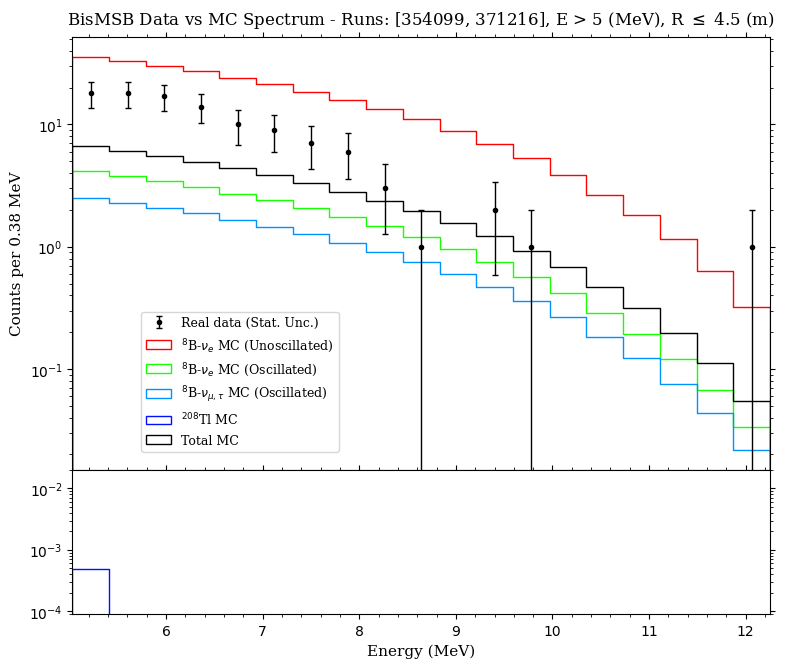

In [42]:
# ----------------------------
# Bins Definition
# ----------------------------
binwidth = 0.38

energy_bins = list(np.arange(min(energy_data),
                             max(energy_data) + binwidth,
                             binwidth))  #These are the energy bin edges

bins_center_energy = (np.array(energy_bins)[:-1] + np.array(energy_bins)[1:])/2


# ===============  MC Distribution ===============
counts_B8_unosc_Nue_mc, _ = np.histogram(energy_b8_Nue_mc, bins = energy_bins, weights = np.ones(len(energy_b8_Nue_mc)) * scaling_mc_b8_unosc_Nue)
counts_B8_osc_Nue_mc, _ = np.histogram(energy_b8_Nue_mc, bins = energy_bins, weights = Pee_b8_Nue_mc * scaling_mc_b8_osc_Nue)

counts_B8_unosc_Numu_mc, _ = np.histogram(energy_b8_Numu_mc, bins = energy_bins, weights = np.ones(len(energy_b8_Numu_mc)) * scaling_mc_b8_osc_Numu)
counts_B8_osc_Numu_mc, _ = np.histogram(energy_b8_Numu_mc, bins = energy_bins, weights = (1 - Pee_b8_Numu_mc) * scaling_mc_b8_osc_Numu)

counts_tl208_mc, _ = np.histogram(energy_tl208_mc, bins = energy_bins, weights = np.ones(len(energy_tl208_mc)) * scaling_mc_tl208)

# ----------- Total MC -----------
#total_mc_counts = counts_B8_osc_Nue_mc + counts_B8_unosc_Numu_mc + counts_tl208_mc
total_mc_counts = counts_B8_osc_Nue_mc + counts_B8_osc_Numu_mc + counts_tl208_mc

# =============== Real Data Distribution Points ===============

energy_counts, edges = np.histogram(energy_data, bins = energy_bins)
bins_center_energy = (edges[:-1] + edges[1:])/2
error_bars = np.sqrt(energy_counts)

# Remove zero count points in real data
bins_center_energy_real_data  = bins_center_energy[energy_counts>0]
error_bars = error_bars[energy_counts>0]
energy_counts = energy_counts[energy_counts>0]

# =============== Plots Building ===============

# Define axes: Construct subplots to conveniently represent the low contribution of the 208Tl spectrum
fig, (ax_top, ax_bot) = plt.subplots(2, 1, sharex=True,figsize=(9,7.5),
                                     gridspec_kw={'height_ratios': [3, 1], 'hspace': 0.0})

# --------- Plot functions ---------
# Real data
ax_top.errorbar(bins_center_energy_real_data, energy_counts,
            yerr=error_bars, fmt='.',
            color='black', label='Real data (Stat. Unc.)',
            elinewidth=1, capsize=2)

# MC components
sn.histplot(x=energy_b8_Nue_mc, bins=energy_bins, weights=np.ones(len(energy_b8_Nue_mc))*scaling_mc_b8_unosc_Nue,
            element='step', alpha=0, ax=ax_top, label=r'$^8$B-$\nu_e$ MC (Unoscillated)', color = '#ff0000')

sn.histplot(x=energy_b8_Nue_mc, bins=energy_bins, weights=Pee_b8_Nue_mc*scaling_mc_b8_osc_Nue,
            element='step', alpha=0, ax=ax_top, label=r'$^8$B-$\nu_e$ MC (Oscillated)', color = '#15ff00')

#sn.histplot(x=energy_b8_Numu_mc, bins=energy_bins, weights=np.ones(len(energy_b8_Numu_mc))*scaling_mc_b8_osc_Numu,
#            element='step', alpha=0, ax=ax_top, label=r'$^8$B-$\nu_{\mu,\tau}$ MC (Unoscillated)', color = '#ff00e6')

sn.histplot(x=energy_b8_Numu_mc, bins=energy_bins, weights=(1 - Pee_b8_Numu_mc)*scaling_mc_b8_osc_Numu,
            element='step', alpha=0, ax=ax_top, label=r'$^8$B-$\nu_{\mu,\tau}$ MC (Oscillated)', color = '#0091ff')

sn.histplot(x=energy_tl208_mc, bins=energy_bins, weights=np.ones(len(energy_tl208_mc))*scaling_mc_tl208,
            element='step', alpha=0, ax=ax_bot, label=r'$^{208}$Tl MC', color = '#0011ff')

#ax_top.hist(bins_center_energy, bins=energy_bins, weights = counts_B8_Nue_mc,
#            histtype='step', linewidth=1.0, label=r'Osc. $^8$B-$\nu_e$ MC', color = '#16fc05')

ax_top.hist(bins_center_energy, bins = energy_bins, weights = total_mc_counts, histtype='step', 
            color='black', linewidth=1.0, label='Total MC')

# --------- Axes Settings ---------

#Scale
ax_top.set_yscale('log')
ax_bot.set_yscale('log')

#Ticks
set_ticks(ax_top)
set_ticks(ax_bot)

#axis limits
ax_top.set_xlim(edges[0], edges[-1])
ax_bot.set_ylim(0, 2e-2)

# --------- Titles ---------

ax_bot.set_xlabel('Energy (MeV)', fontdict = font_style_axis)
ax_top.set_ylabel(f'Counts per {binwidth} MeV', fontdict = font_style_axis)
ax_bot.set_ylabel('')

# ---- Build a single legend combining both axes ----
#Order to appear the Legends
order = ['Real data (Stat. Unc.)',
         r'$^8$B-$\nu_e$ MC (Unoscillated)',
         r'$^8$B-$\nu_e$ MC (Oscillated)',
         #r'$^8$B-$\nu_{\mu,\tau}$ MC (Unoscillated)',
         r'$^8$B-$\nu_{\mu,\tau}$ MC (Oscillated)',
         r'$^{208}$Tl MC',
         'Total MC'
         ]

handles_top, labels_top = ax_top.get_legend_handles_labels()
handles_bot, labels_bot = ax_bot.get_legend_handles_labels()

handles = handles_top + handles_bot
labels  = labels_top  + labels_bot

label_to_handle = dict(zip(labels, handles))
ordered_handles = [label_to_handle[l] for l in order]

ax_top.legend(ordered_handles, order, bbox_to_anchor=(0.24, 0.38), prop = font_prop)
# ------------------ end of common legends-------------------

ax_top.set_title(fr'BisMSB Data vs MC Spectrum - Runs: [354099, 371216], E > 5 (MeV), R $\leq$ {posr_cut*10**(-3)} (m)', fontdict = font_style_title, y = 1.01)

plt.show()

In [28]:
counts_B8_unosc_Numu_mc

array([5.1750371 , 4.70428047, 4.26765725, 3.81583094, 3.38327822,
       2.95342284, 2.54877517, 2.14613823, 1.79426004, 1.47445547,
       1.17892683, 0.91414768, 0.69085828, 0.50528238, 0.34437473,
       0.22834075, 0.13805396, 0.08141015, 0.03795871])